# Amazon Orders Data Analysis

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("Amazon Sale Report.csv")

In [4]:
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,Unnamed: 20,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,NaN,False,Easy Ship,NaN
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,NaN,True,NaN,NaN
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [5]:
data.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,Unnamed: 20,B2B,fulfilled-by,Unnamed: 22
128970,128970,406-6001380-7673107,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,NaN,False,NaN,False
128972,128972,407-9547469-3152358,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.0,Halol,Gujarat,389350.0,IN,NaN,False,NaN,False
128974,128974,408-7436540-8728312,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,NaN,False,NaN,False


In [6]:
data.shape

(128975, 24)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [8]:
data.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Style                      0
SKU                        0
Category                   0
Size                       0
ASIN                       0
Courier Status          6872
Qty                        0
currency                7795
Amount                  7795
ship-city                 33
ship-state                33
ship-postal-code          33
ship-country              33
Unnamed: 20           128975
B2B                        0
fulfilled-by           89698
Unnamed: 22            49050
dtype: int64

In [9]:
# Storing all the categorical column in other variable
categorical = data.select_dtypes("object")

In [10]:
# Imputing all categorical features of data
for i in categorical.columns:
    if categorical[i].isnull().sum() > 0:
        data[i] = categorical[i].fillna(categorical[i].mode()[0])
    else:
        pass
            
   

In [11]:
data.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Style                      0
SKU                        0
Category                   0
Size                       0
ASIN                       0
Courier Status             0
Qty                        0
currency                   0
Amount                  7795
ship-city                  0
ship-state                 0
ship-postal-code          33
ship-country               0
Unnamed: 20           128975
B2B                        0
fulfilled-by               0
Unnamed: 22                0
dtype: int64

In [12]:
# As we can see there is no values in unnamed:20 and irrilivant values exist in Unnamed: 22 also index
#is unique that's why i am dropping all the columns here.
data.drop(["Unnamed: 20","Unnamed: 22","index"],axis = 1,inplace = True)

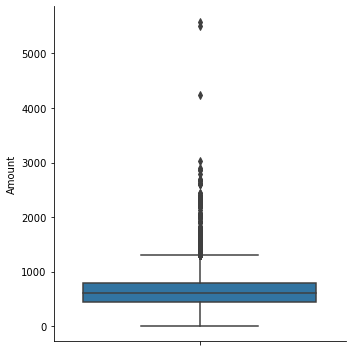

In [13]:
# Checking is there outliers in Amount columns
sns.catplot(data = data,y="Amount",kind = "box")

In [14]:
# There is outliers in amount column that's why filling it by median
data["Amount"]=data["Amount"].fillna(data["Amount"].median())


In [15]:
# Ship_Postal_code is float but still filling it by mode because it's highly related with city
data["ship-postal-code"]=data["ship-postal-code"].fillna(data["ship-postal-code"].mode()[0])

In [16]:
# Changing date column as datetime
data["Date"] = pd.to_datetime(data["Date"])

In [17]:
data.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [18]:
data.dtypes

Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Style                         object
SKU                           object
Category                      object
Size                          object
ASIN                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code             float64
ship-country                  object
B2B                             bool
fulfilled-by                  object
dtype: object

In [19]:
data.duplicated().sum()

6

In [20]:
#deleting duplicate values
data = data.drop_duplicates()

In [21]:
data.duplicated().sum()

0

## Now there is no null value in data as well as no duplicate and all the values exist of same data type 

In [22]:
data.describe()

,Qty,Amount,ship-postal-code
count,128969.00000,128969.000000,128969.000000
mean,0.90445,645.924240,463899.453621
std,0.31333,272.779901,191496.607906
min,0.00000,0.000000,110001.000000
25%,1.00000,459.000000,382421.000000
50%,1.00000,605.000000,500033.000000
75%,1.00000,771.000000,600024.000000
max,15.00000,5584.000000,989898.000000


In [23]:
# Creating two column, one for year and second one for month for further analysis

data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month_name()

In [24]:
data["Status"].value_counts()

Shipped                          77801
Shipped - Delivered to Buyer     28769
Cancelled                        18329
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: Status, dtype: int64

<BarContainer object of 13 artists>

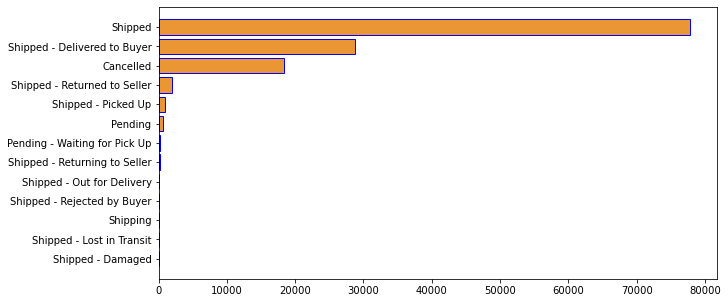

In [25]:
plt.figure(figsize = (10,5))
plt.barh(data["Status"].value_counts().sort_values().index,np.sort(data["Status"].value_counts().values),color = "#eb9634",edgecolor = "blue")

## Here we have summary of how many items has been shipped,delivered to buyer,cancelled,pending etc.

In [26]:
data['Fulfilment'].value_counts()

Amazon      89692
Merchant    39277
Name: Fulfilment, dtype: int64

<AxesSubplot:ylabel='Fulfilment'>

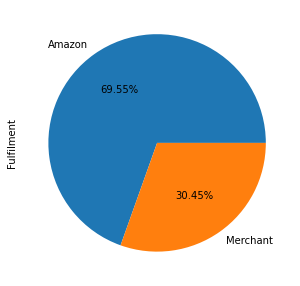

In [27]:
plt.figure(figsize = (10,5))
data['Fulfilment'].value_counts().plot(kind = "pie",autopct = "%.2f%%",)

## Observation :- Fulfillment is an service In which third party vendors store their product for selling and e-commerce giant picks,packs and ships.
## According to this data, 69.55% of items have been fulfilling by Amazone fulfillment itself and 30.45% items have been fulfilled by Merchant 

In [28]:
data["Sales Channel "].value_counts()

Amazon.in     128845
Non-Amazon       124
Name: Sales Channel , dtype: int64

<AxesSubplot:ylabel='Sales Channel '>

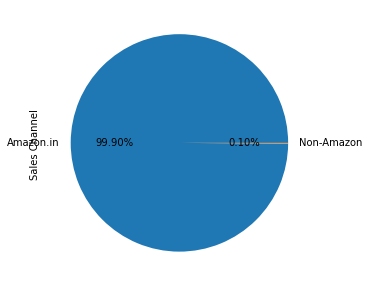

In [29]:
plt.figure(figsize = (10,5))
data["Sales Channel "].value_counts().plot(kind = "pie",autopct = "%.2f%%")

## Observation:- 99.90% of items have been taken through Amazone.in Sales Channel and rest 0.10% items have been taken through Non Amazone Channel

In [30]:
data["ship-service-level"].value_counts()

Expedited    88609
Standard     40360
Name: ship-service-level, dtype: int64

<AxesSubplot:ylabel='ship-service-level'>

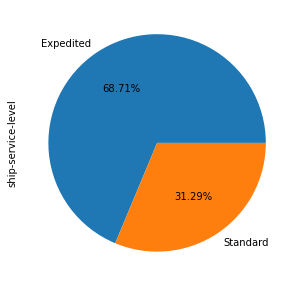

In [31]:
plt.figure(figsize = (10,5))
data["ship-service-level"].value_counts().plot(kind = "pie",autopct = "%.2f%%")

## Observation:- 68.71% shipments have been done through Expedited service level and 31.29% shipments have been done through Standard service level

In [32]:
data["Category"].value_counts()

Set              50281
kurta            49874
Western Dress    15500
Top              10622
Ethnic Dress      1159
Blouse             926
Bottom             440
Saree              164
Dupatta              3
Name: Category, dtype: int64

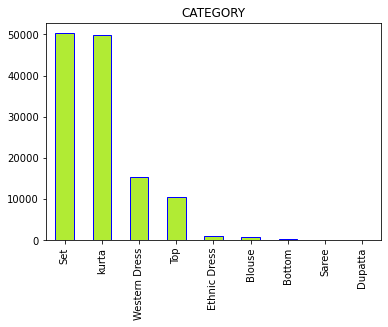

In [33]:
data["Category"].value_counts().plot(kind = "bar",color = "#b1eb34",edgecolor = "blue")
plt.title("CATEGORY");

## Obsrvation :- Category (set) is over-ordered and category(Dupatta) is under-ordered

In [34]:
b = data.groupby(["ship-state"]).agg({"Order ID":"count"}).sort_values(by = "Order ID",ascending = False).head().reset_index()
b

,ship-state,Order ID
0,MAHARASHTRA,22292
1,KARNATAKA,17325
2,TAMIL NADU,11483
3,TELANGANA,11330
4,UTTAR PRADESH,10637


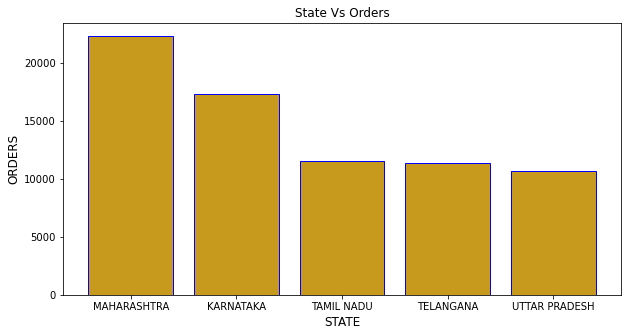

In [35]:
plt.figure(figsize = (10,5))
plt.bar(b["ship-state"],b["Order ID"],color = "#c7991c",edgecolor = "blue")
plt.ylabel("ORDERS",fontsize = 12)
plt.xlabel("STATE",fontsize = 12)
plt.title("State Vs Orders",fontsize = 12);


## Observation:- Most of orders have been achieved from Maharastra and after that Karnataka then Tamil Nadu 

In [36]:
data1 = data.groupby(["ship-state"]).agg({"Amount":"sum"})

In [37]:
data1 = data1.reset_index()

In [38]:
a = data1.sort_values(by = "Amount",ascending = False).head()
a

,ship-state,Amount
28,MAHARASHTRA,14072611.14
23,KARNATAKA,11044369.37
57,TELANGANA,7335880.65
59,UTTAR PRADESH,7234164.08
56,TAMIL NADU,6923420.11


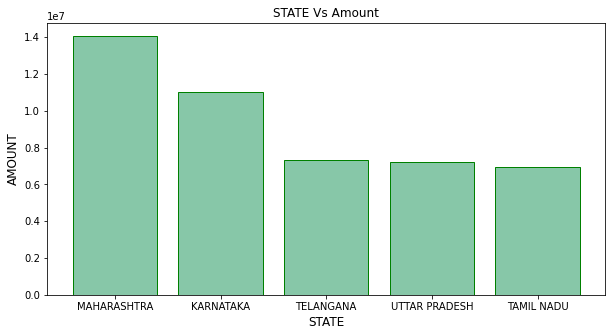

In [39]:
plt.figure(figsize=(10,5))
plt.bar(a["ship-state"],a["Amount"],color = "#87c7a8",edgecolor = "green")
plt.xlabel("STATE",fontsize = 12)
plt.ylabel("AMOUNT",fontsize = 12)
plt.title("STATE Vs Amount",fontsize = 12);


## Observation:- In terms of orders Tamilnadu is on third highest state but in terms of amount of orders Tamilnadu is fifth highest state 

In [40]:
c= data.groupby("B2B").agg({"Amount":"sum"})
c = c.reset_index()
print(c)

     B2B       Amount
0  False  82696042.51
1   True    608160.79


In [41]:
c["B2B"].values

array([False,  True])

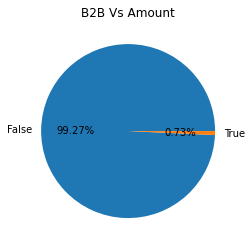

In [42]:
plt.pie(c["Amount"].values,labels = c["B2B"].values,autopct = "%.2f%%");
plt.title("B2B Vs Amount",fontsize = 12);

## Observation:- Orders and Amount of orders both are less  from B2B 

In [43]:
d = data.groupby(["Year","Month"]).agg({"Order ID":"count"}).reset_index().sort_values(by = "Order ID",ascending = False)
print(d)

   Year  Month  Order ID
0  2022  April     49065
3  2022    May     42037
1  2022   June     37696
2  2022  March       171


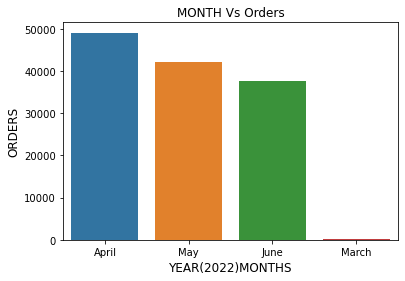

In [44]:
sns.barplot(d["Month"].values,d["Order ID"].values)
plt.xlabel("YEAR(2022)MONTHS",fontsize = 12)
plt.ylabel("ORDERS",fontsize = 12)
plt.title("MONTH Vs Orders",fontsize = 12);

## Observation :- we have data of only 2022 of 4 months, in 2022 Maximum orders have been achieved in month of April and minimum order is in month of March

In [45]:
e = data.groupby(["Year","Month"]).agg({"Amount":"sum"}).reset_index().sort_values(by = "Amount",ascending = False)
explode = [0,0,0,0.50]
e

,Year,Month,Amount
0,2022,April,30651893.32
3,2022,May,27739319.75
1,2022,June,24805861.38
2,2022,March,107128.85


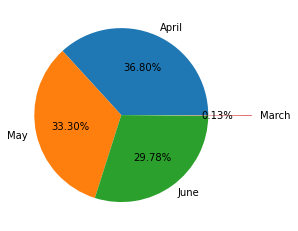

In [46]:
plt.pie(e["Amount"],explode = explode,labels = e["Month"],autopct = "%.2f%%");

## Observation:- 36.79% amount of orders have been achieved in month of April and 0.13% orders have been achieved in march that is less 

In [47]:
# Creating one more column for quarter of year
data["Quarter"] = data["Date"].dt.quarter

In [48]:
data.groupby(["Quarter"]).agg({"Order ID":"count","Amount":"sum"})

,Order ID,Amount
Quarter,,
1,171,107128.85
2,128798,83197074.45


## Observation - count of orders and amount of orders both are high in 2nd quarter of year

In [49]:
size = data.groupby(["Size"]).agg({"Order ID": "count"}).reset_index()
size

,Size,Order ID
0,3XL,14815
1,4XL,427
2,5XL,550
3,6XL,738
4,Free,378
5,L,22130
6,M,22709
7,S,17090
8,XL,20875
9,XS,11161


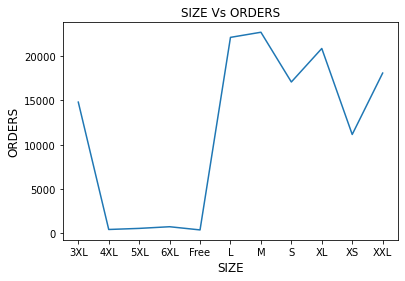

In [50]:
plt.plot(size["Size"],size["Order ID"])
plt.xlabel("SIZE",fontsize = 12)
plt.ylabel("ORDERS",fontsize =12)
plt.title("SIZE Vs ORDERS");


## Observation:- The orders of size(L,M,S and XL) is more

In [51]:
ship = data.groupby(["ship-city"]).agg({"Order ID":"count"}).reset_index().sort_values(by = "Order ID",ascending = False)
ship

,ship-city,Order ID
776,BENGALURU,11249
2906,HYDERABAD,8074
4795,MUMBAI,6126
5393,NEW DELHI,5795
1466,CHENNAI,5421
...,...,...
4140,"Kharghar, NAVI MUMBAI",1
4137,Khardaha,1
4135,"Kharar, Mohali",1
4133,"Kharagpur, West Bengal",1


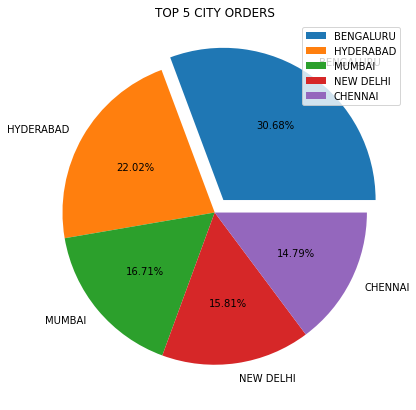

In [52]:
plt.figure(figsize = (12,7))
explode = [0.1,0,0,0,0]
plt.pie(ship["Order ID"].head(5),labels =ship["ship-city"].head(5),explode = explode,autopct = "%.2f%%");
plt.title("TOP 5 CITY ORDERS");
plt.legend()

# Obseravation:- Top 5 city from where orders have been got,where Bengluru is on top

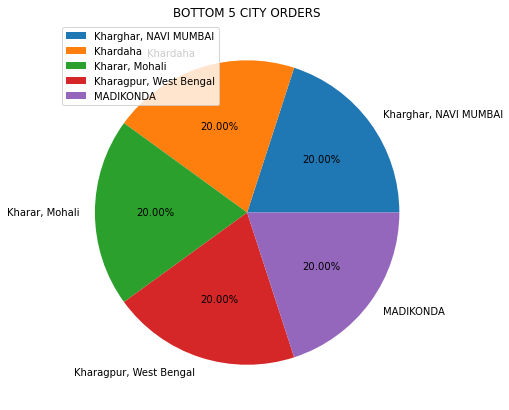

In [53]:
plt.figure(figsize = (12,7))
plt.pie(ship["Order ID"].tail(5),labels =ship["ship-city"].tail(5),autopct = "%.2f%%");
plt.title("BOTTOM 5 CITY ORDERS");
plt.legend();